In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("boston_final.csv")
df

,Serial No.,Location,Area,Price
0,1,A1,2000,2500000
1,2,A2,2100,2600000
2,3,A3,2200,2700000
3,4,A4,2300,2800000
4,5,A5,2400,2900000
5,6,A6,2500,3000000
6,7,A7,2600,3100000
7,8,A8,2700,3200000
8,9,A9,2800,3300000
9,10,A10,2900,3400000


In [6]:
df.head()

,Serial No.,Location,Area,Price
0,1,A1,2000,2500000
1,2,A2,2100,2600000
2,3,A3,2200,2700000
3,4,A4,2300,2800000
4,5,A5,2400,2900000


In [7]:
df.describe()

,Serial No.,Area,Price
count,15.000000,15.000000,1.500000e+01
mean,8.000000,2700.000000,3.200000e+06
std,4.472136,447.213595,4.472136e+05
min,1.000000,2000.000000,2.500000e+06
25%,4.500000,2350.000000,2.850000e+06
50%,8.000000,2700.000000,3.200000e+06
75%,11.500000,3050.000000,3.550000e+06
max,15.000000,3400.000000,3.900000e+06


In [8]:
df.dtypes

Serial No.     int64
Location      object
Area           int64
Price          int64
dtype: object

In [9]:
df.shape

(15, 4)

In [10]:
df.columns

Index(['Serial No.', 'Location', 'Area', 'Price'], dtype='object')

In [11]:
df.isnull()

,Serial No.,Location,Area,Price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [12]:
df.isnull().sum()

Serial No.    0
Location      0
Area          0
Price         0
dtype: int64

In [13]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [17]:
print(df.dtypes)

Serial No.     int64
Location      object
Area           int64
Price          int64
dtype: object


In [19]:
# Drop all non-numeric columns
data_clean = df.select_dtypes(include=['object', 'int64'])

In [25]:
data_clean = df.drop("Location", axis=1)

In [28]:
# Try converting everything to numeric, ignoring errors
data_numeric = df.apply(pd.to_numeric, errors='coerce')

In [29]:
print(data_numeric.isnull().sum())

Serial No.     0
Location      15
Area           0
Price          0
dtype: int64


In [30]:
# Drop columns with too many missing values (e.g., >50%)
data_clean = data_numeric.dropna(axis=1, thresh=len(data_numeric) * 0.5)


In [31]:
data_clean = data_clean.fillna(data_clean.mean())


In [32]:
print(data_clean.columns)


Index(['Serial No.', 'Area', 'Price'], dtype='object')


In [36]:
X = data_clean.drop("Price", axis=1)
y = data_clean["Price"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.0
R2 Score: 1.0


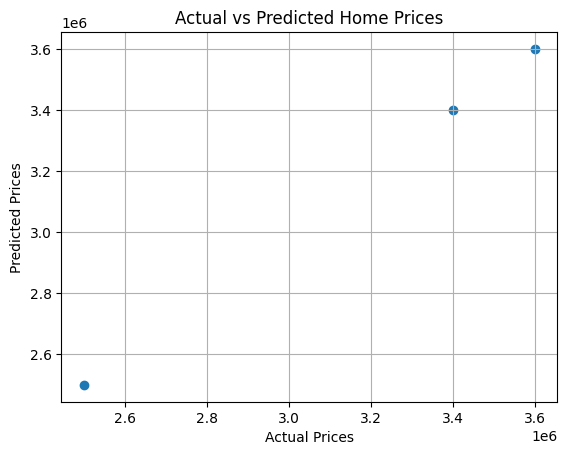

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Home Prices")
plt.grid(True)
plt.show()